In [8]:
# import the labraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

%matplotlib inline

In [9]:
# import the dataset 
df = pd.read_csv('/Users/nhienchau/Downloads/bankloans.csv')
print(df.head())

   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0


In [10]:
# check the number of null values in a dataset
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [11]:
# count all values without null values in a dataset 
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [12]:
# remove all the null values in a dataset
df = df.dropna()


<AxesSubplot:xlabel='age', ylabel='income'>

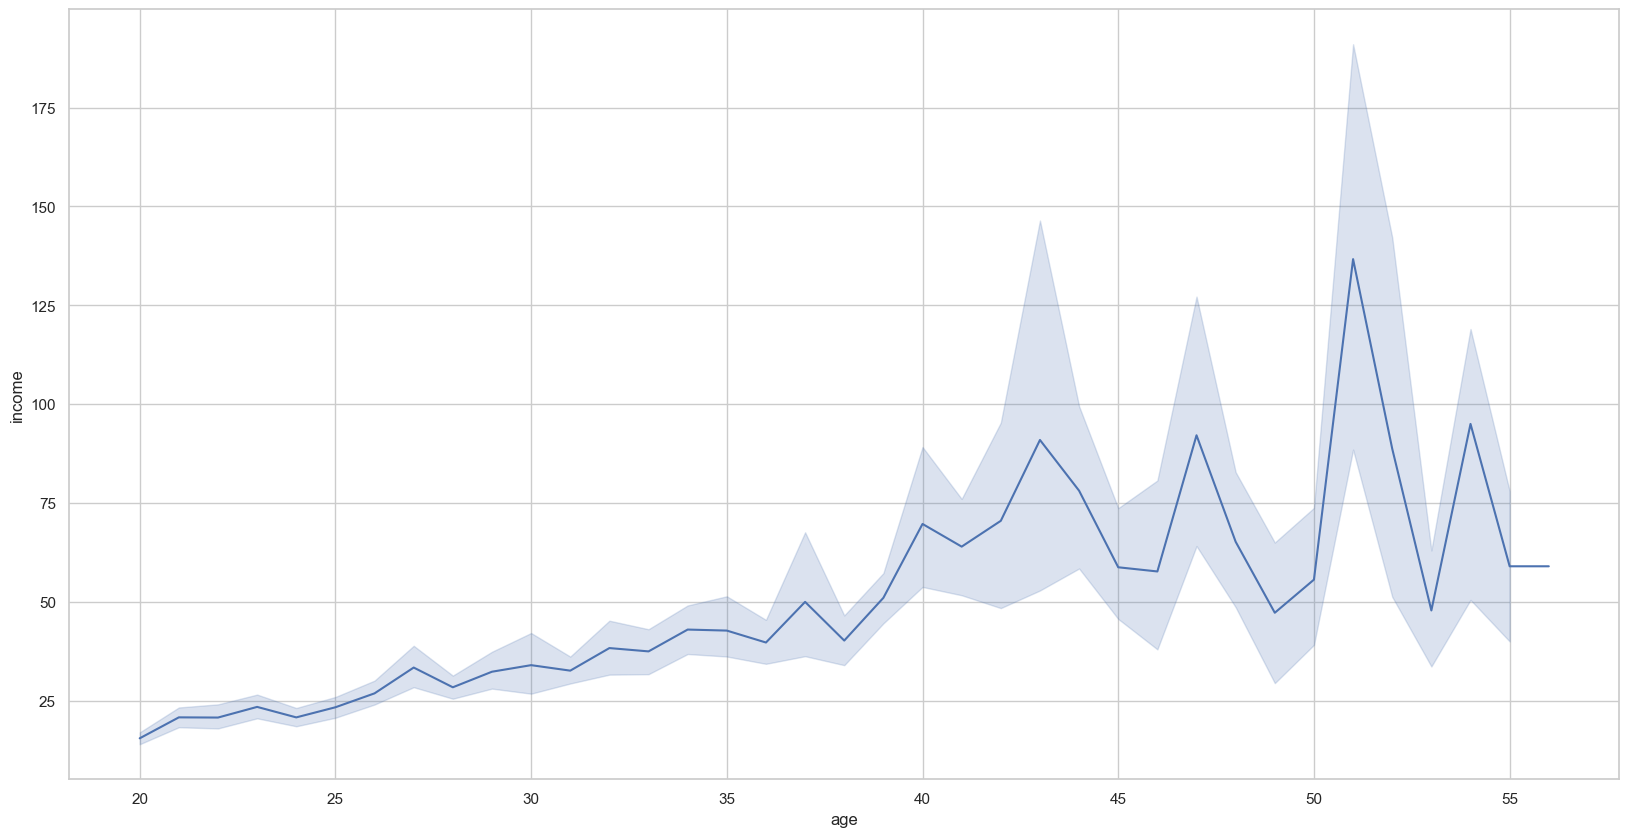

In [13]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='income',data=df,ax=ax)

<AxesSubplot:xlabel='age', ylabel='debtinc'>

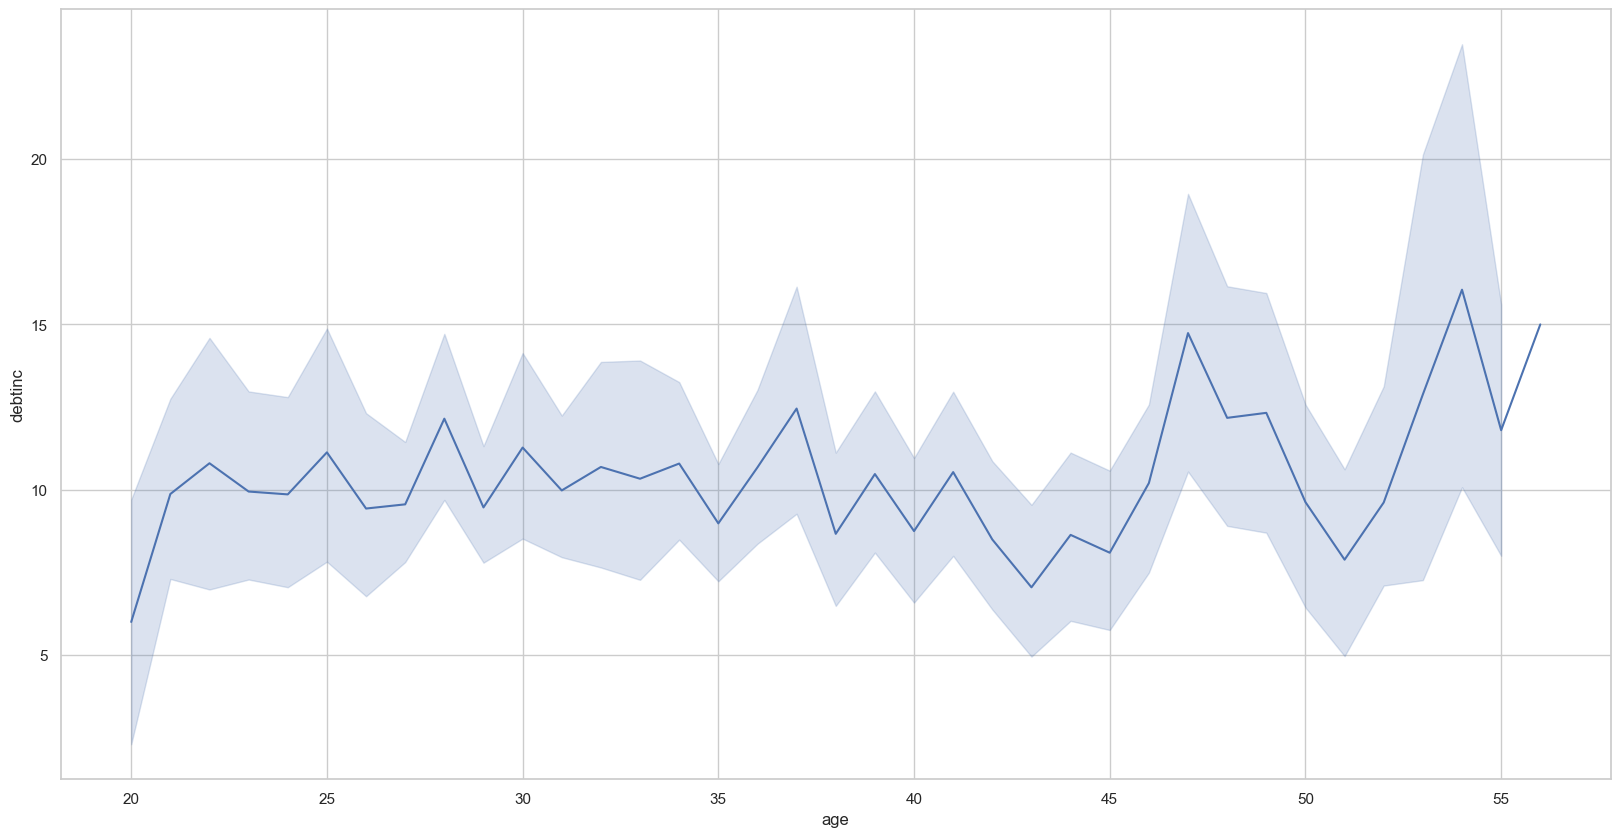

In [14]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='debtinc',data=df,ax=ax)

In [15]:
# inspect the number of default and non-default values in a dataset
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

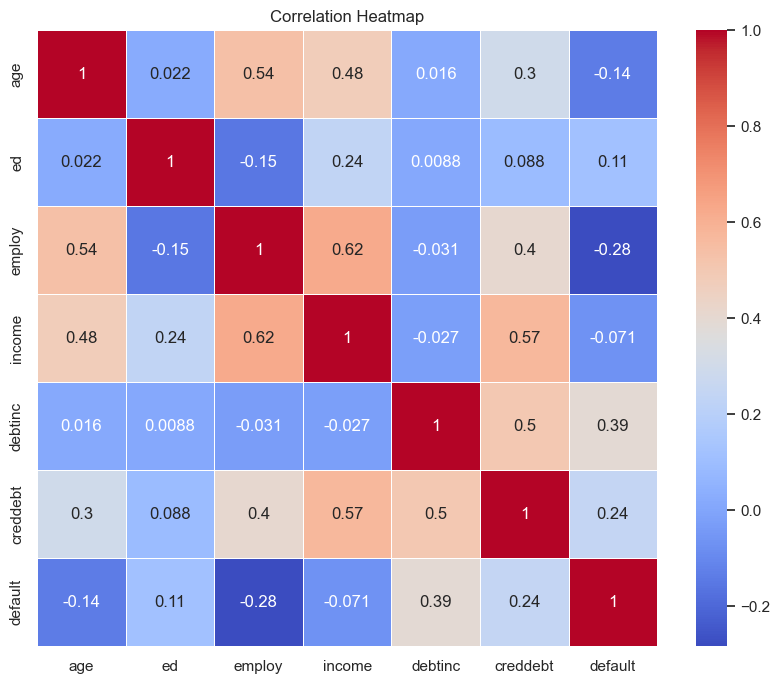

In [16]:
correlation_matrix = df[['age','ed','employ', 'income', 'debtinc', 'creddebt', 'default']].corr()

# create the Heatmap:
#uUse seaborn to create the heatmap.

# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


X = df[['age', 'ed', 'employ', 'income', 'debtinc', 'creddebt']]
y = df['default']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary outcomes
y_pred = (y_pred_proba >= 0.5).astype(int)

# Evaluate the model
print(classification_report(y_test, y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, y_pred_proba))



              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       161
         1.0       0.76      0.59      0.67        49

    accuracy                           0.86       210
   macro avg       0.82      0.77      0.79       210
weighted avg       0.86      0.86      0.86       210

ROC-AUC Score: 0.870452528837622


Accuracy: 0.861904761904762
Precision: 0.7631578947368421
Recall: 0.5918367346938775
F1-Score: 0.6666666666666667
ROC-AUC: 0.870452528837622


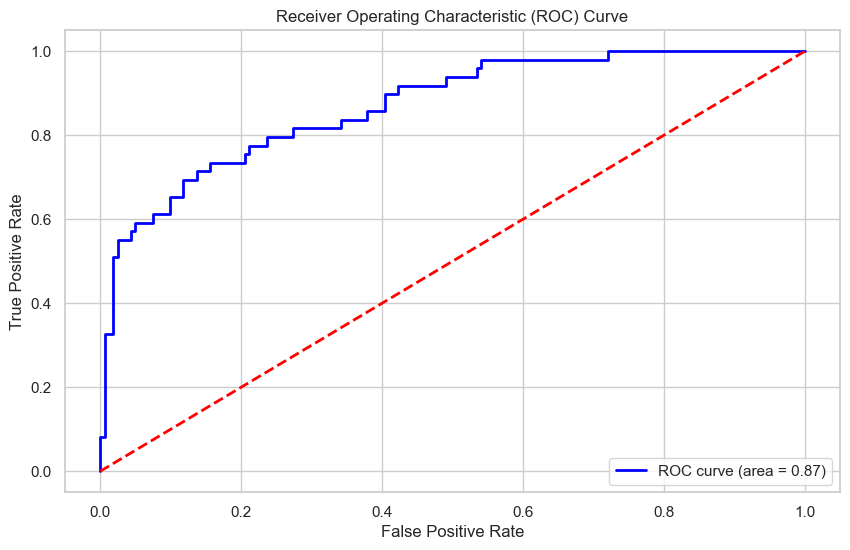

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and y_pred are the predicted labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()